# Large-sample confidence intervals for the difference between two proportions

## Summary

## Scenario

## Method

### Setup the notebook

In [1]:
# import the packages
from src import load
from statsmodels.stats.proportion import confint_proportions_2indep
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# set the Seaborn theme
sns.set_theme()

### Load the data

In [3]:
# import the data
sewer = load.sewer()

### Prepare the data

Swap out the codes in `[Immunity, Children]` for meaningful labels.

In [4]:
sewer["Immunity"].replace(to_replace={0: "No", 1: "Yes"}, inplace=True)
sewer["Children"].replace(to_replace={1: "No", 2: "Yes"}, inplace=True)

### Visualise the data

In [5]:
# take a copy of the dataframe
gsewer = sewer.copy(deep=True)

In [6]:
# aggregate the data
gsewer["Frequency"] = 0
gsewer = gsewer.groupby(["Immunity", "Children"])[["Frequency"]].count()
gsewer.reset_index(inplace=True)

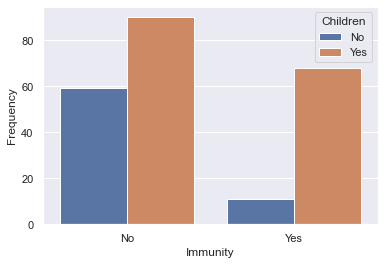

In [7]:
# plot the data
ax = sns.barplot(data=gsewer, x="Immunity", y="Frequency", hue="Children")
plt.show()

### Return the $z$-interval

In [11]:
# construct a contingency table
pd.crosstab(index=sewer["Children"], columns=sewer["Immunity"], margins=True)

Immunity,No,Yes,All
Children,,,
No,59,11,70
Yes,90,68,158
All,149,79,228


In [9]:
# declare the parameters
x1=68   # has children, has immunity
n1=158  # has children
x2=11   # no children, has immunity
n2=70   # no children

Note, default actual argument for formal agument `method=newcomb`
does not return the result expected by M248.

In [10]:
# return the confidence interval
confint_proportions_2indep(
    count1=x1,
    nobs1=n1,
    count2=x2,
    nobs2=n2,
    method="wald")

(0.1582197356059404, 0.38825404377923145)